In [1]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import numpy as np
import scipy as sp
import pandas as pd
import scanpy as sc

In [2]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Datasets_integration/Integrated_cancer_Joanito_and_Healthy_datasets_7000_output.h5ad'
adata = sc.read_h5ad(input)

In [3]:
adata

AnnData object with n_obs × n_vars = 191909 × 7000
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels', 'Unified Cell States', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'nFeature_RNA', 'sample.origin', 'dataset_x', 'iCMS', 'msi', 'dataset_y', 'Tumor Stage', 'MSS/MSI', 'Side', 'Group Stage', 'Stage TNM', 'iCMS.transcriptomic', 'iCMS.inferCNV', 'KRAS', 'BRAF', 'TP53', 'APC', 'PIK3CA', 'LymphNode', 'Normal', 'Tumor', 'CMS', 'Sample origin'
    var: 'feature_types-Colorectal cancer', 'genome-Colorectal cancer', 'gene_id-Kong-Healthy gut', 'gene_name-Kong-Healthy gut', 'n_cells_by_counts-Kong-Healthy gut', 'mean_co

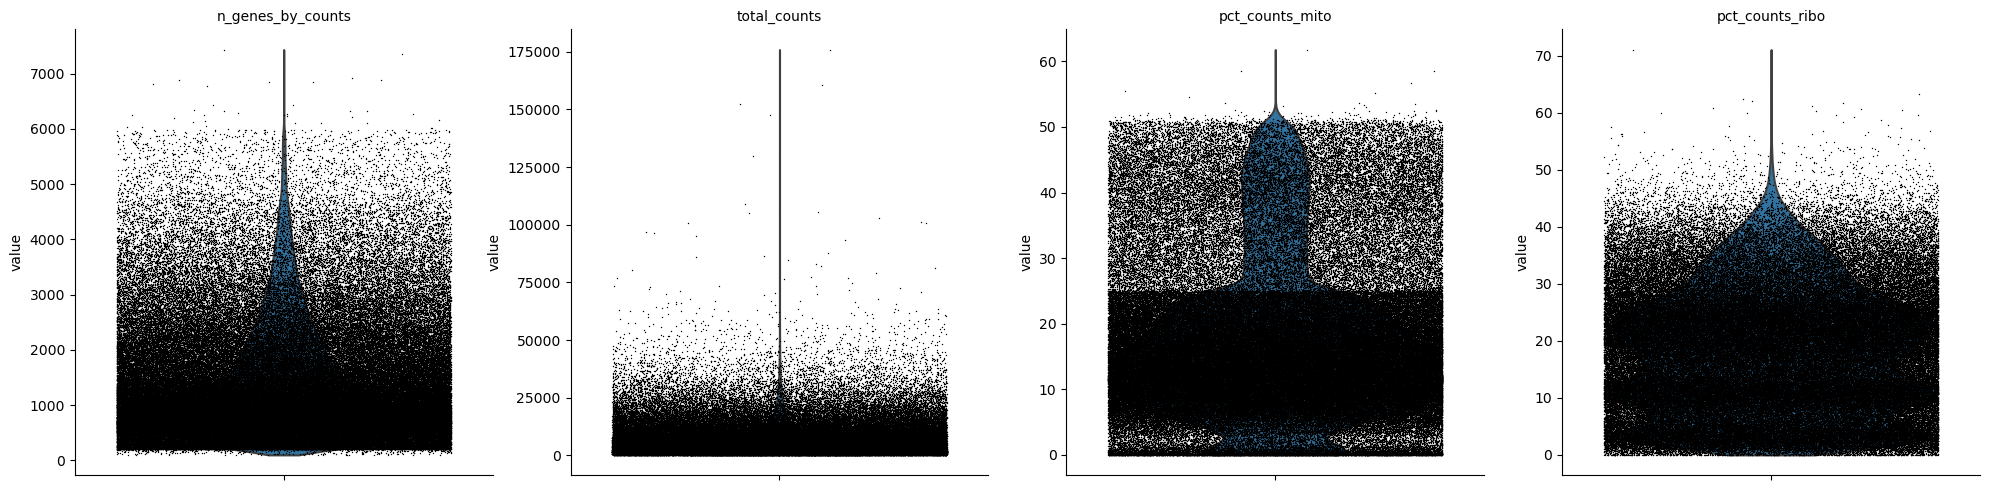

In [5]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

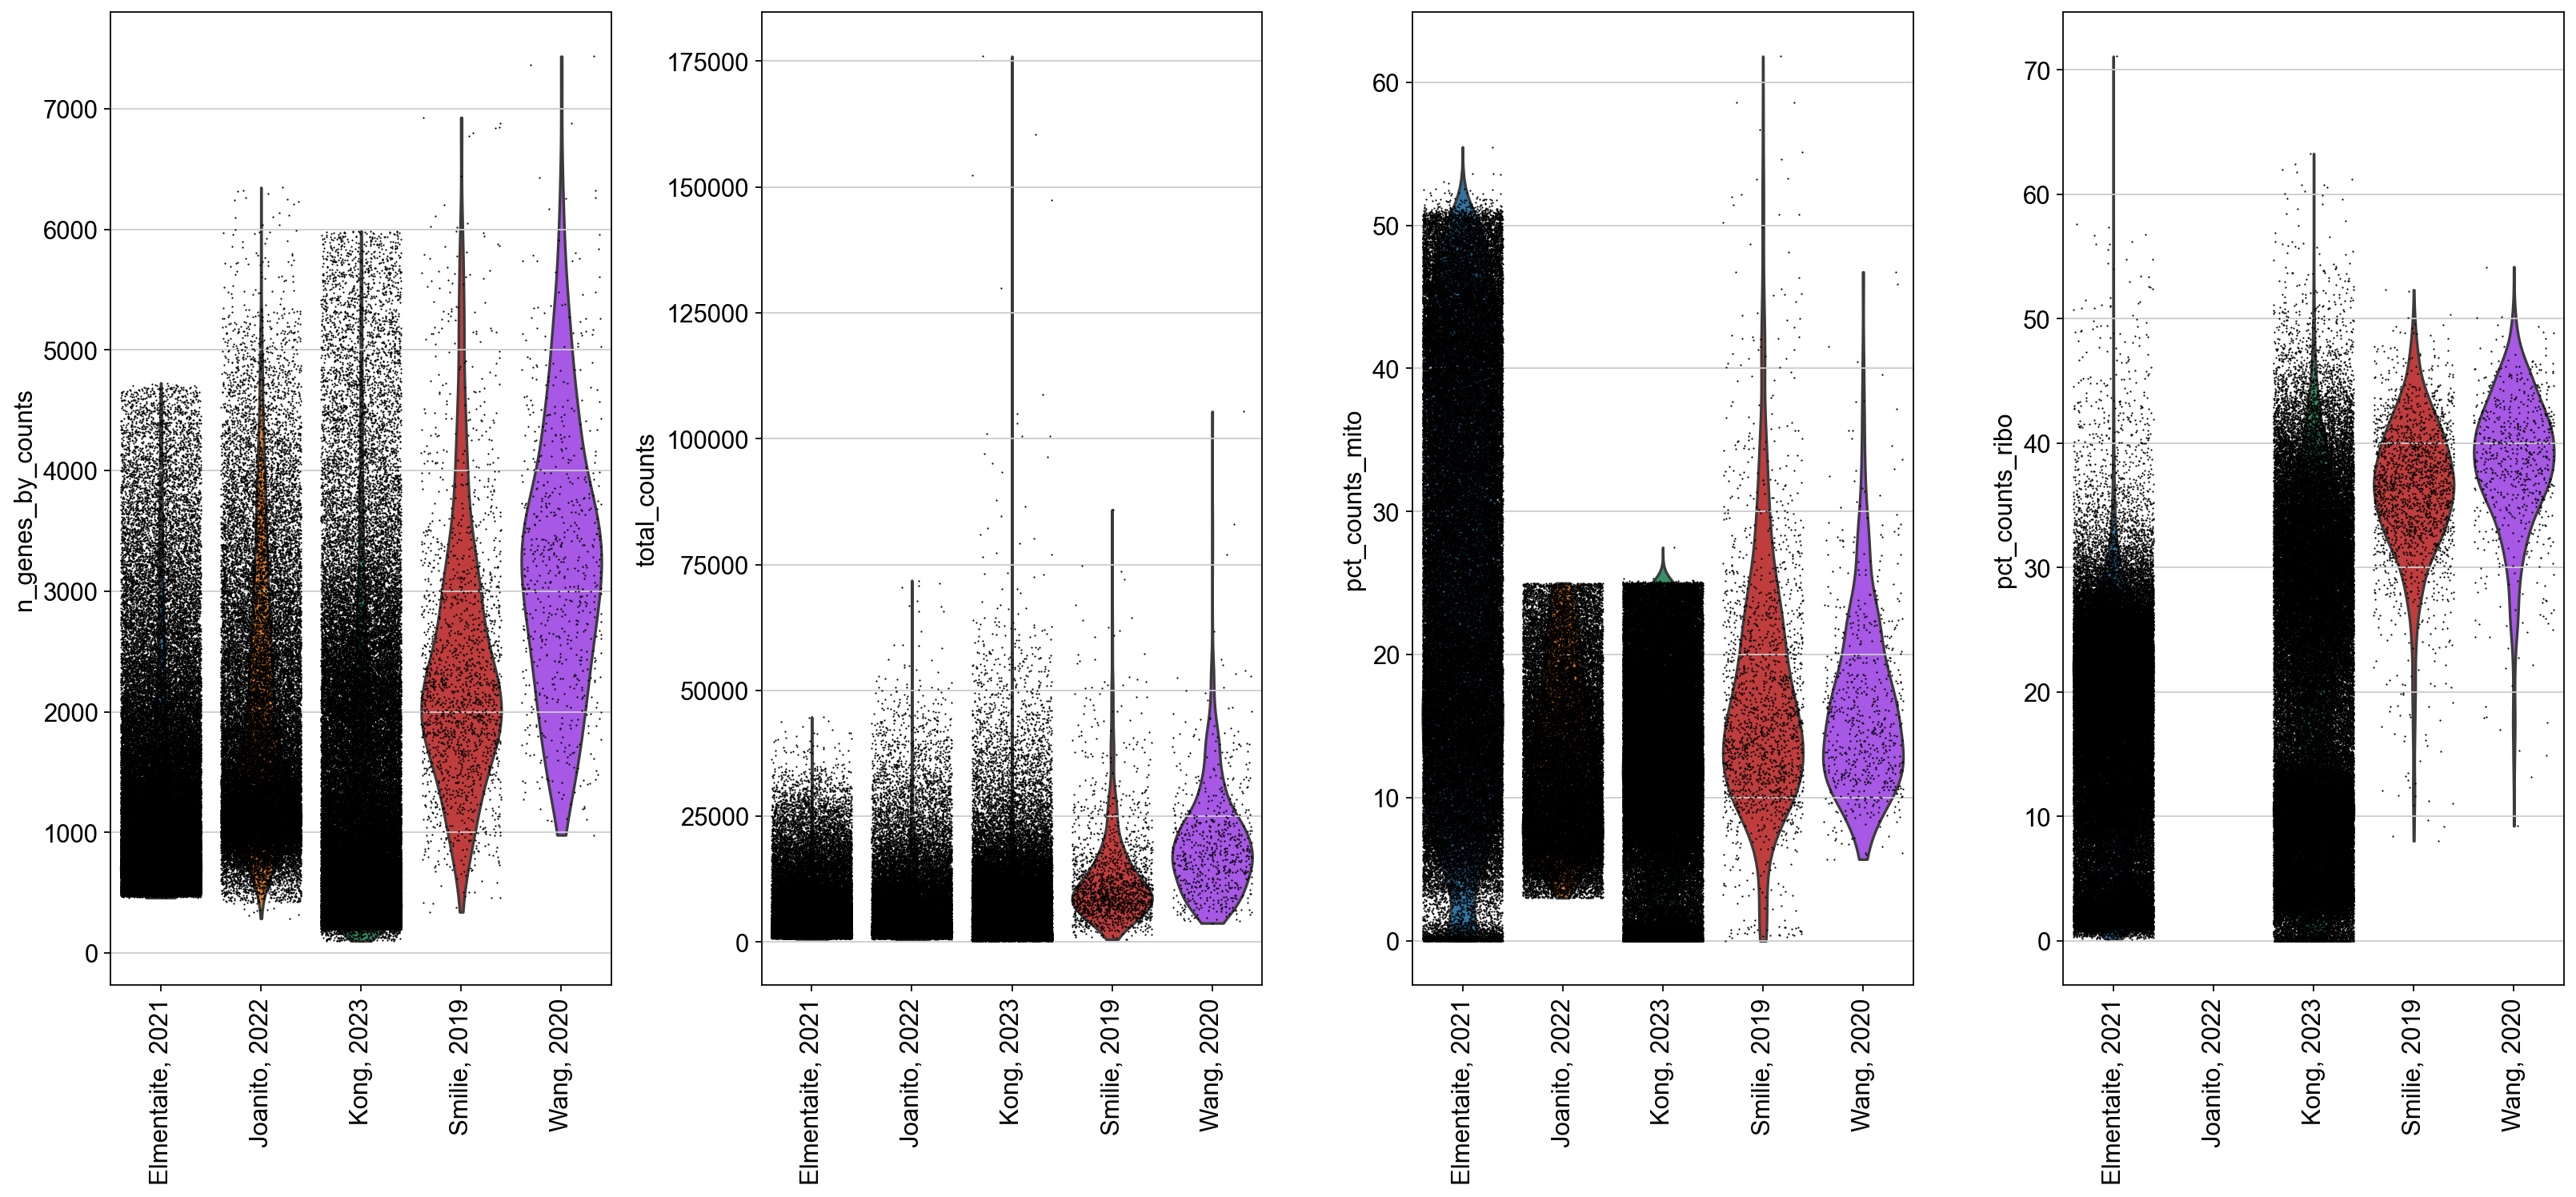

In [6]:
#Check Quality Metrics by Samples
#Create visualisation of QC covariates for samples
sc.set_figure_params(figsize=(5, 10), dpi=80)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo'],
             jitter=0.4, groupby = 'Study_name', rotation = 90)

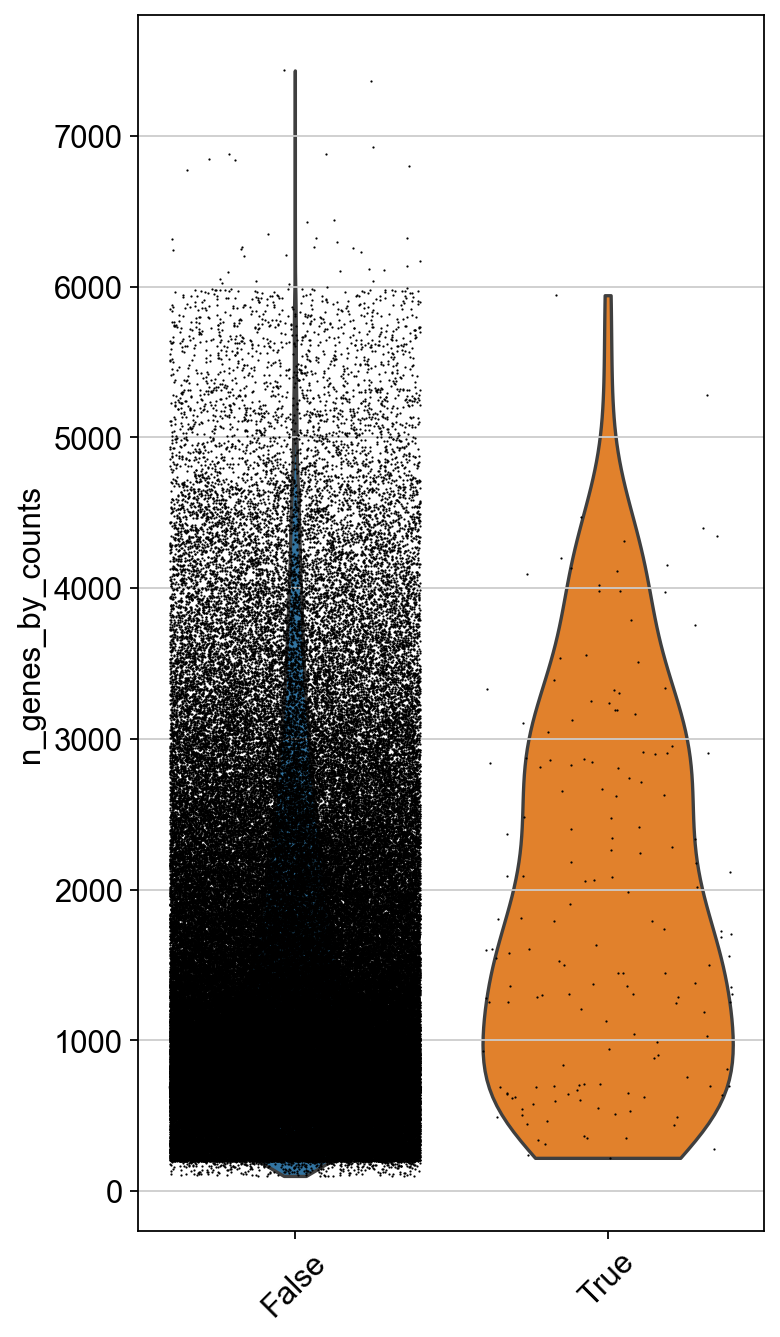

In [7]:
sc.pl.violin(adata, 'n_genes_by_counts',
             jitter=0.4, groupby = 'doublet_info', rotation=45)

In [8]:
# Concatenate 'doublet_info' and 'Study_name' columns into new column 'doublet_info_study_name'
adata.obs['doublet_info_study_name'] = adata.obs['doublet_info'].astype(str) + '_' + adata.obs['Study_name'].astype(str)

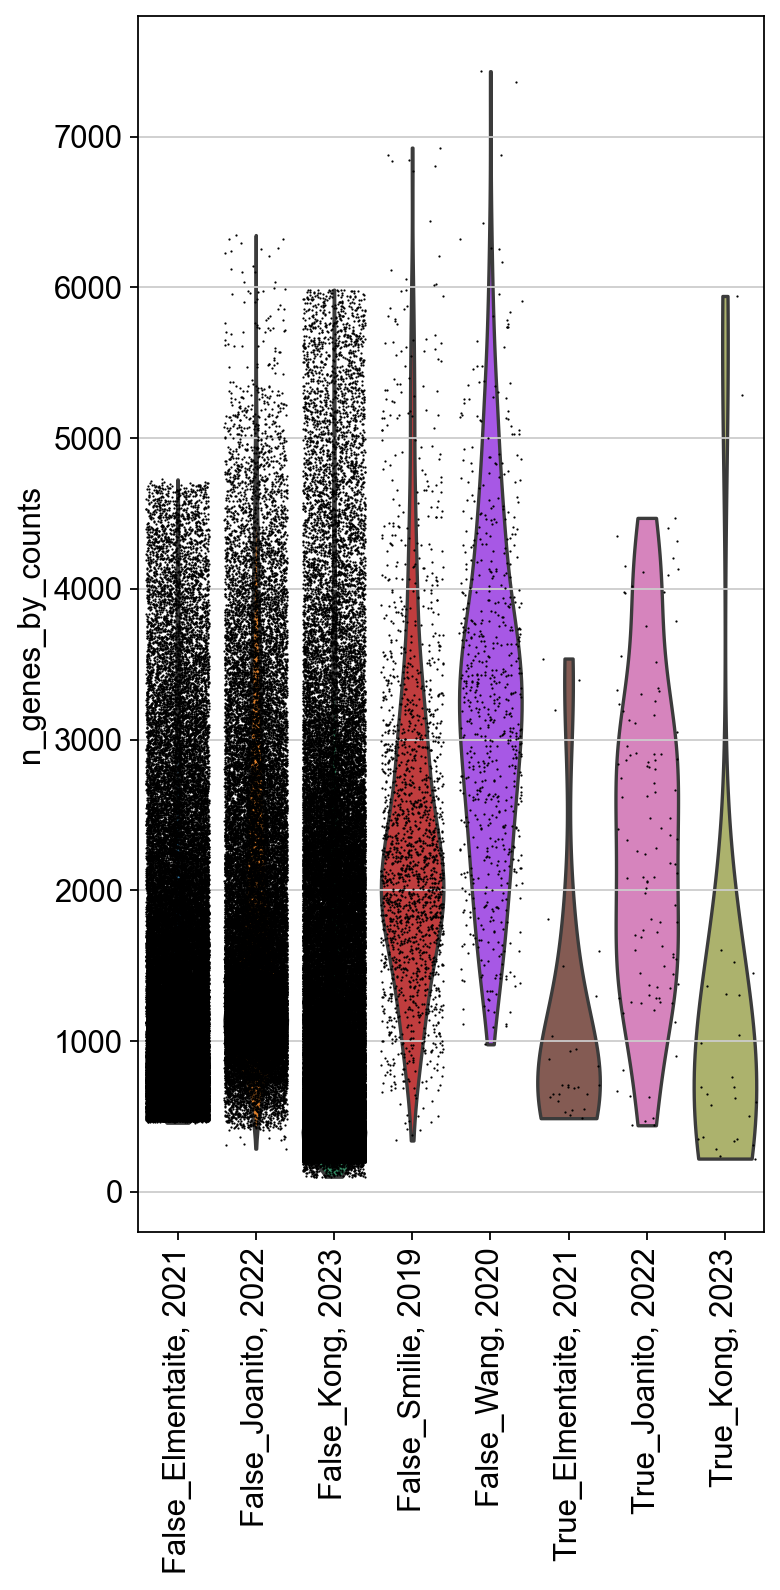

In [10]:
sc.pl.violin(adata, 'n_genes_by_counts',
             jitter=0.4, groupby = 'doublet_info_study_name', rotation=90)